In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import numpy as np

In [0]:
import pandas as pd
dataset = pd.read_csv("/content/drive/My Drive/Datasets: Cyber/Uncensored/ICMP.csv")
dataset.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,UTC Time,Time,Relative Time,Absolute Time,Delta Time,Source,Destination,Protocol,Length,Info,SourcePort,DestPort,Cumulative Bytes,Hwdestaddr,Hwsrcaddr,Unresolved Destport,Unresolved Srcport,NetSrcAddr,NetDestAddr,ExpertInfo,Class
0,12-03-2017 15:23,15:23:08,0.000000,0.000000,20:53:08,0.000000,192.168.61.6,192.168.100.1,SSH,110,Server: Encrypted packet (len=44),22.0,38844.0,110,fa:16:3e:50:e1:f3,fa:16:3e:68:44:52,38844.0,22.0,192.168.61.6,192.168.100.1,NaN,ICMPFlood
1,12-03-2017 15:23,15:23:08,0.003862,0.003862,20:53:08,0.003862,192.168.100.1,192.168.61.6,TCP,66,38844 > 22 [ACK] Seq=1 Ack=45 Win=273 Len=0 ...,38844.0,22.0,176,fa:16:3e:68:44:52,fa:16:3e:50:e1:f3,22.0,38844.0,192.168.100.1,192.168.61.6,NaN,ICMPFlood
2,12-03-2017 15:23,15:23:08,0.005187,0.005187,20:53:08,0.001325,192.168.61.6,192.168.100.1,SSH,174,Server: Encrypted packet (len=108),22.0,38844.0,350,fa:16:3e:50:e1:f3,fa:16:3e:68:44:52,38844.0,22.0,192.168.61.6,192.168.100.1,NaN,ICMPFlood
3,12-03-2017 15:23,15:23:08,0.005523,0.005523,20:53:08,0.000336,192.168.61.6,192.168.100.1,SSH,102,Server: Encrypted packet (len=36),22.0,38844.0,452,fa:16:3e:50:e1:f3,fa:16:3e:68:44:52,38844.0,22.0,192.168.61.6,192.168.100.1,NaN,ICMPFlood
4,12-03-2017 15:23,15:23:08,0.006986,0.006986,20:53:08,0.001463,192.168.100.1,192.168.61.6,TCP,66,38844 > 22 [ACK] Seq=1 Ack=153 Win=273 Len=0...,38844.0,22.0,518,fa:16:3e:68:44:52,fa:16:3e:50:e1:f3,22.0,38844.0,192.168.100.1,192.168.61.6,NaN,ICMPFlood


In [0]:
dataset["Date"]=pd.to_datetime(dataset["Date"])

In [0]:
li=[]
for i in dataset:
  li.append(i)

In [0]:
li=li[1:-1]

In [0]:
dataset=dataset.drop(li,axis=1)

In [0]:
dataset.head()

,Date,Class
0,2017-12-03 15:23:00,ICMPFlood
1,2017-12-03 15:23:00,ICMPFlood
2,2017-12-03 15:23:00,ICMPFlood
3,2017-12-03 15:23:00,ICMPFlood
4,2017-12-03 15:23:00,ICMPFlood


In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


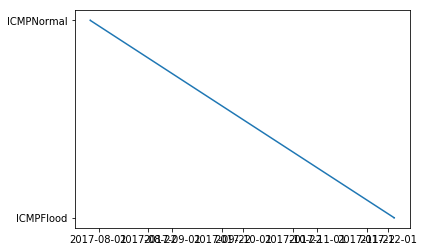

In [0]:
plt.plot(dataset["Date"].tolist(),dataset["Class"].tolist())

In [0]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [0]:
type(dataset["Class"])

pandas.core.series.Series

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset["Class"]=le.fit_transform(dataset["Class"])

In [0]:
dataset.reindex(np.random.permutation(dataset.index))
data = pd.Series(dataset["Class"].values, index=dataset["Date"].values)

In [0]:
size = int(len(data) * 0.94)
train, test = data[:size], data[size:]

In [0]:
train

2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
2017-12-03 15:23:00    0
                      ..
2017-07-28 10:07:00    1
2017-07-28 10:07:00    1
2017-07-28 10:07:00    1
2017-07-28 10:07:00    1
2017-07-28 10:07:00    1
2017-07-28 10:07:00    1
2017-07-28 10:07:00    1
2017-07-28 10:07:00    1
2017-07-28 10:07:00    1


In [0]:
history=[x for x in train]

In [0]:
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.